<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/ml05_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier #KNN 분류기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀(분류기)
from sklearn.metrics import confusion_matrix, accuracy_score # 평가지표

Python에서 이미지 다루기

In [2]:
flower = datasets.load_sample_image('flower.jpg')
#> load_sample_image 함수 : 이미지 파일을 읽어서, 이미지를 np.ndarray 타입으로 변환.

In [3]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [4]:
type(flower)

numpy.ndarray

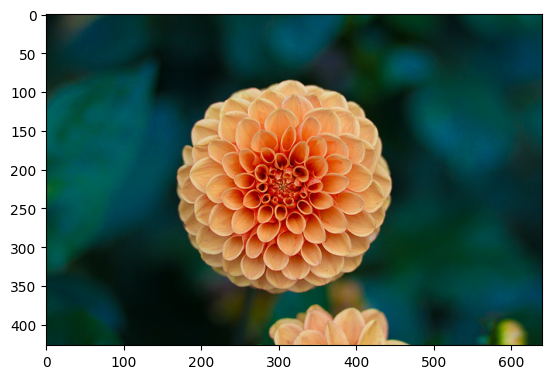

In [5]:
plt.imshow(flower)

이미지 ndarray 배열의 모양

* 흑백 이미지 : (height, width), (height, width, 1)
* 컬러 이미지 :
  * 불투명 이미지(jpg, bmp, ...) : (height, width, 3)
  * 투명도가 있는 이미지(png) : (height, width, 4)
* 이미지 ndarray의 숫자 스케일 :
  * 0 ~ 255 정수 스케일
  * 0.0 ~ 1.0 실수 스케일

In [6]:
flower[:,:,0]

array([[2, 3, 7, ..., 1, 0, 0],
       [1, 3, 7, ..., 0, 1, 1],
       [2, 6, 7, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 5, 6, 7],
       [0, 1, 1, ..., 6, 7, 7],
       [0, 1, 0, ..., 7, 8, 9]], dtype=uint8)

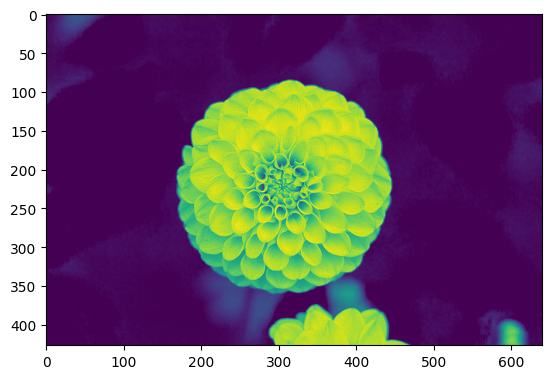

In [7]:
plt.imshow(flower[:,:, 0])
plt.show()

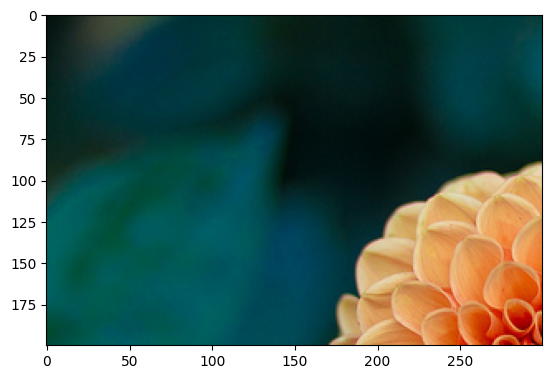

In [9]:
# 이미지 잘라내기 - ndarray slicing

flower_cropped =flower[:200,:300,:]
plt.imshow(flower_cropped)
plt.show()

In [10]:
# ndarray를 이미지 파일로 저장 :
plt.imsave('flower_cropped.jpg',flower_cropped)

In [11]:
img = plt.imread('flower_cropped.jpg')

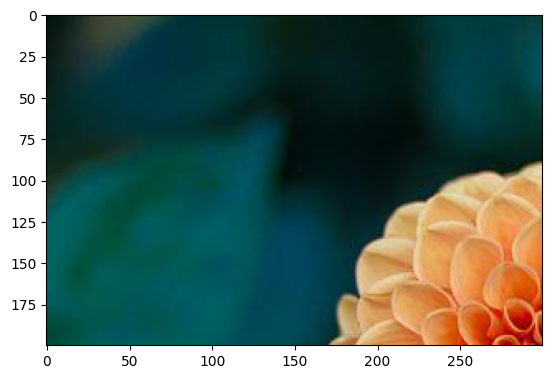

In [12]:
plt.imshow(img)

##MNIST
70000개의 숫자(0~9) 손글씨 흑백 이미지(28*28) 가 numpy.ndarray로 저장된 데이터셋.

In [14]:
mnist = datasets.fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
type(mnist) #> Bunch - Python의 dict와 비슷(key-value 쌍으로 데이터 저장)

sklearn.utils._bunch.Bunch

In [19]:
X = mnist['data'].values.copy()

In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X.shape #> (70000, 784) = (n_samples, n_features)
# 샘플 데이터 1개 => 28*28 모양의 2차원 배열을 1차원 으로 펼친 형태

(70000, 784)

In [24]:
y = mnist['target'].values.copy() #타겟 배열

In [25]:
type(y)

pandas.core.arrays.categorical.Categorical

In [26]:
y.shape

(70000,)

In [27]:
y[:10] # 0 ~ 9 숫자들이 무작위로 섞여 있음.

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [28]:
val_counts = y.value_counts()
val_counts

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

특성 배열 X의 첫번째 원소 시각화

In [31]:
img = X[0].reshape((28,28))

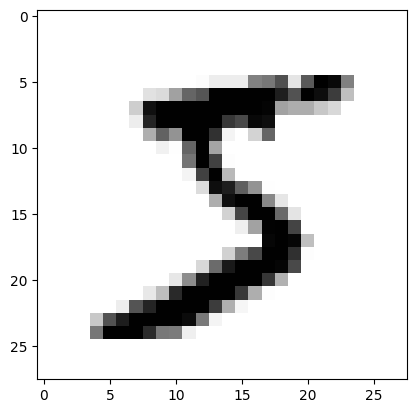

In [34]:
plt.imshow(img, cmap=plt.cm.binary)

In [35]:
imgs = X[0:100].reshape((28,28,-1))

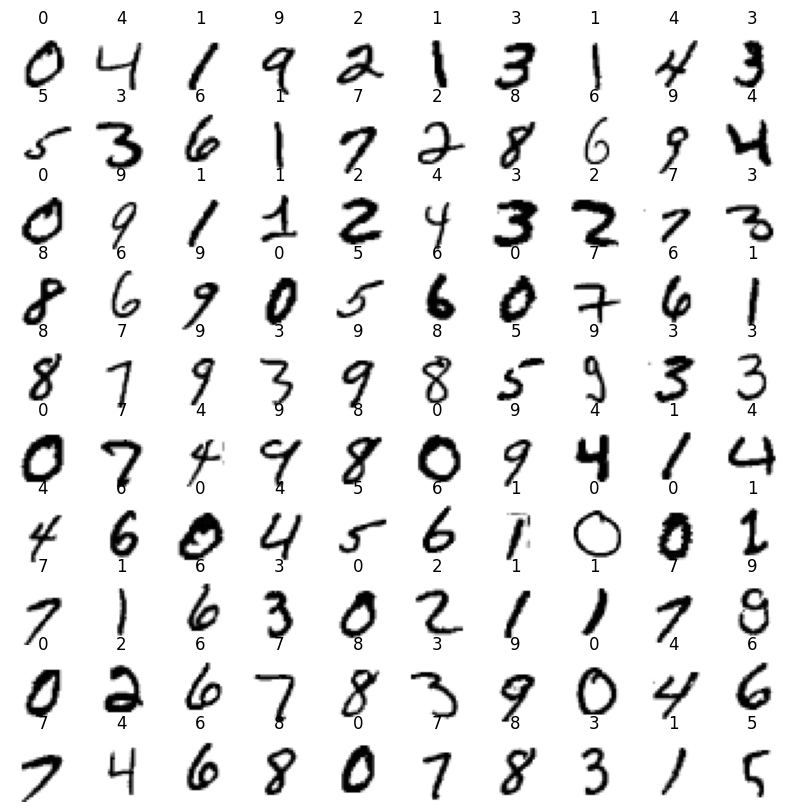

In [41]:
nrows=10 # subplot의 row 개수
ncols=10 # subplot의 column 개수

fig, ax = plt.subplots(nrows=nrows,ncols=ncols, figsize=(ncols,nrows))

for i in range(nrows):
  for j in range(ncols):
    idx = i * nrows + j + 1
    img = X[idx].reshape((28,28))
    label = y[idx]
    ax[i,j].imshow(img, cmap=plt.cm.binary)
    ax[i,j].axis('off')
    ax[i,j].set_title(label)
plt.show()

# 훈련/검증/테스트 셋 분리

* 훈련 셋(Train set) : 머신 러닝 모델을 학습시키기 위한 데이터.
* 검증 셋(Validation set) : 훈련된 머신 러닝 모델의 일반화 성능을 테스트하기 위한 데이터 셋.
* 테스트 셋(Test set) : 최종적으로 선택된 머신 러닝 모델의 일반화 성능을 예상하기 위해서 사용하는 데이터 셋. 머신 러닝 전 과정에서 오직 한 번만 사용됨.

In [38]:
plt.show()